# <div align="center">  Artificial Intelligence Concordia Workshop 1: <br /> </div>
## <div align="center"> Basics of Machine Learning, Linear Regression and Logistic Regression</div>

<div align="center">
  <img src="https://github.com/olibel270/Workshop1JupyterNote/blob/master/images/AICLogo.jpg?raw=1" style="width: 300px" /></div>

---------------------------------------------------------------------

<div align="right">
  Follow us on:<br />
[ Facebook](https://www.facebook.com/AISConU/)<br />
[Our Website](https://www.aisconcordia.com)<br />
  </div>
 


# Introduction

#Machine Learning as a subset of AI

# Python

Python is an interpreted programming language. It is object oriented, and has many available libraries, or modules to help implement simple or complex functions.

 Some Python libraries useful for machine learning: 
* Numpy
* Matlplotlib
* Pandas
* Pytorch
* Keras
* Tensorflow
* Scikit-Learn
  
The Python libraries used in machine learning implementations are highly optimized to make use of multiple cores and GPUs when performing computations.

Python has a very large community of users. It is considered one of the more intuitive, yet powerful programming languages available. As such, it is easy to find information on specific issues simply by doing a google search of the problem or function required.

For more information on how to get started with Python, there are plenty of tutorials available online, such as: 
https://realpython.com/python-first-steps/
  
The Google Colab Environment will allow you to run Python scripts and snippets of code without requiring any setup on your part. Google also provides a free Tesla K80 GPU for rapid machine learning computations.

## Required Libraries

Before we get started, let's import all the necessary libraries to our notebook:

In [1]:
# Import Python Packages
import warnings
import sys
import os

# Relevant Libraries for ML
import csv
import scipy
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

# Show Packages versions
print('Installed packages and their versions:')
print('csv: {}'.format(csv.__version__))
print('scipy: {}'.format(scipy.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))
print('numpy: {}'.format(np.__version__))
print('pandas: {}'.format(pd.__version__))
print('seaborn: {}'.format(sns.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))
print('sklearn: {}'.format(sklearn.__version__))

# Setting some Parameters
sns.set(color_codes=True)
%matplotlib inline
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points



Installed packages and their versions:
csv: 1.0
scipy: 0.19.1
matplotlib: 2.1.2
numpy: 1.14.6
pandas: 0.22.0
seaborn: 0.7.1
matplotlib: 2.1.2
sklearn: 0.19.2


In [0]:
# Importing metrics for evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from scipy import stats
from scipy.stats import norm, skew #for some statistics

# General Framework of Machine Learning

<a id="8"></a> <br>
### 4-1 Inputs
* train.csv - the training set

<a id="9"></a> <br>

### 4-2 Outputs
* sale prices for every record in test.csv

* Define Problem 
* Specify Inputs & Outputs
* Exploratory data analysis
* Data Collection
* Data Preprocessing
* Data Cleaning
* Visualization
* Model Design, Training, and Offline Evaluation
* Model Deployment, Online Evaluation, and Monitoring
* Model Maintenance, Diagnosis, and Retraining

 <img src="http://s9.picofile.com/file/8338227634/workflow.png" />
 
Regression Vs. Classification


## 2-1 How to solve Problem?
**Data Science has so many techniques and procedures that can confuse anyone.**

**Step 1**: Translate your business problem statement into technical one

**Step 2**: Decide on the supervised learning technique

Classification Vs. regression

**Step 3**: Literature survey

**Step 4**: Data cleaning

Missing values

different techniques to impute missing values 

Duplicate records

Incorrect values
3 standard deviations from the mean

**Step 5**: Feature engineering

Removing redundant features
 metrics like AIC and BIC to identify redundant features. There are built in packages to perform operations like forward selection, backward selection etc. to remove redundant features.

Transforming a feature
A feature might have a non linear relationship with the output column. While complex models can capture this with enough data, simple models might not be able to capture this. I usually try to visualize different functions of each column like log, inverse, quadratic, cubic etc. and choose the transformation that looks closest to a normal curve.

**Step 6**: Data modification

Scaling
Skew
Up-sample
Down-sample

**Step 7**: Modelling

Start with simple models, then more complex ones

Knowledge of the assumptions of each models

**Step 8**: Model comparison
Cross validation basically brings out an average performance of a model. avoid over-fitting. 
randomize data before cross validation.

A good technique to compare performance of different models is ROC curves. ROC curves help you visualize performance of different models across different thresholds. While ROC curves give a holistic sense of model performance, based on the business decision, you must choose the performance metric like Accuracy, True Positive Rate, False Positive Rate, F1-Score etc.

**Step 9**: Error analysis


**Step 10**: Improving your best model

Once I have the best model, I usually plot training vs testing accuracy [or the right metric] against the number of parameters. Usually, it is easy to check training and testing accuracy against number of data points. Basically this plot will tell you whether your model is over-fitting or under-fitting. This articleDetecting over-fitting vs under-fitting explains this concept clearly.

Understanding if your model is over-fitting or under-fitting will tell you how to proceed with the next steps. If the model is over-fitting, you might consider collecting more data. If the model is under-fitting, you might consider making the models more complex. [Eg. Adding higher order terms to a linear / logistic regression]

**Step 11**: Deploying the model


**Step 12**: Adding feedback
 historical data. 
capture the current trends or changes




# Problem Definition


In this workshop, we will try to solve the following problem using basic machine learning techniques:

> *Given a housing dataset describing in detail the **features** of different houses for sale, we want to predict with the highest possible accuracy the **sale price** of any given house *




# Data


  ## Datasets

In the past years, many quality datasets have been made available online :

https://en.wikipedia.org/wiki/List_of_datasets_for_machine_learning_research

https://www.analyticsvidhya.com/blog/2018/03/comprehensive-collection-deep-learning-datasets/

https://www.kaggle.com/datasets




In this workshop, we will be using the Ames Housing Dataset from Kaggle:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

### The Housing Dataset
  

<img src="https://kaggle2.blob.core.windows.net/competitions/kaggle/5407/media/housesbanner.png"></img>





#### Variables


The variables are :
* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
*  LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: $Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

## Importing the dataset

In [3]:
if not os.path.exists('Workshop1JupyterNote'):
  ! git clone https://github.com/olibel270/Workshop1JupyterNote.git --quiet

%cd Workshop1JupyterNote
!git checkout master --quiet

from subprocess import check_output

print("Checking whether the dataset import properly:")
print(check_output(["ls", "./dataset"]).decode("utf8")) #check the files available in the directory

/content/Workshop1JupyterNote
Checking whether the dataset import properly:
data_description.txt
sample_submission.csv
sample_submission.csv.gz
test.csv
test.csv.gz
train.csv
train.csv.gz



## Challenges of the dataset

1- Attributes are numeric and categorical so you have to figure out how to load and handle data.

2- It is a Regression problem, allowing you to practice with easier types of supervised learning algorithm.

## Representing Data

Numpy

In [0]:
training_set = open('dataset/train.csv')
csv_training_set = csv.DictReader(training_set)

Pandas

In [0]:
train = pd.read_csv('dataset/train.csv')
test= pd.read_csv('dataset/test.csv')

## Exploring the Dataset

**Googling for Pandas documentation or anything else, can you:**

- Find the dimensions of the training dataset.

- Show info on the training set.

- Print the features of the first 5 houses in the dataset

- Do the same for the last 10

- Show a statistical summary of all attributes.

- Show the columns of the training set (the name of the features)

- What does train.describe() do?


**Slighltly more advanced:**
- Show how many houses have the value 0 assigned to specific features

- Rearrange/group the information in the training set by sale type


**More advanced:**
- Display the houses in the training set with a sale price greater than 700 000$


**Pandas Cheat Sheet: **
*https://s3.amazonaws.com/assets.datacamp.com/blog_assets/PandasPythonForDataScience.pdf*

**Example**

Showing a random sample of 5 houses:

In [6]:
train.sample(5) 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
488,489,190,RL,60.000,10800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,ConLD,Normal,160000
900,901,20,RL,nan,7340,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,110000
1079,1080,20,RL,65.000,8775,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2007,WD,Normal,126000
1117,1118,20,RL,57.000,9764,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,130000
674,675,20,RL,80.000,9200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,140000


## Visualizing Data


### Scatter plot

Purpose:  To identify the type of relationship (if any) between two quantitative variables.




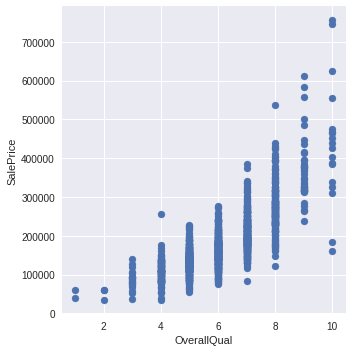

In [7]:
columns = ['SalePrice','OverallQual']
sns.FacetGrid(train[columns], size=5).map(plt.scatter, "OverallQual", "SalePrice")
plt.show()

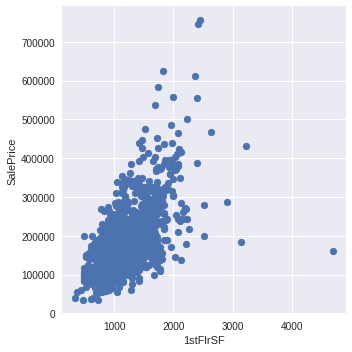

In [8]:
columns = ['SalePrice','1stFlrSF']
sns.FacetGrid(train[columns], size=5).map(plt.scatter, "1stFlrSF", "SalePrice")
plt.show()

### Multivariate Plots

Now we can look at the interactions between the variables.

Let’s look at scatterplots of all pairs of attributes. This can be helpful to spot structured relationships between input variables.

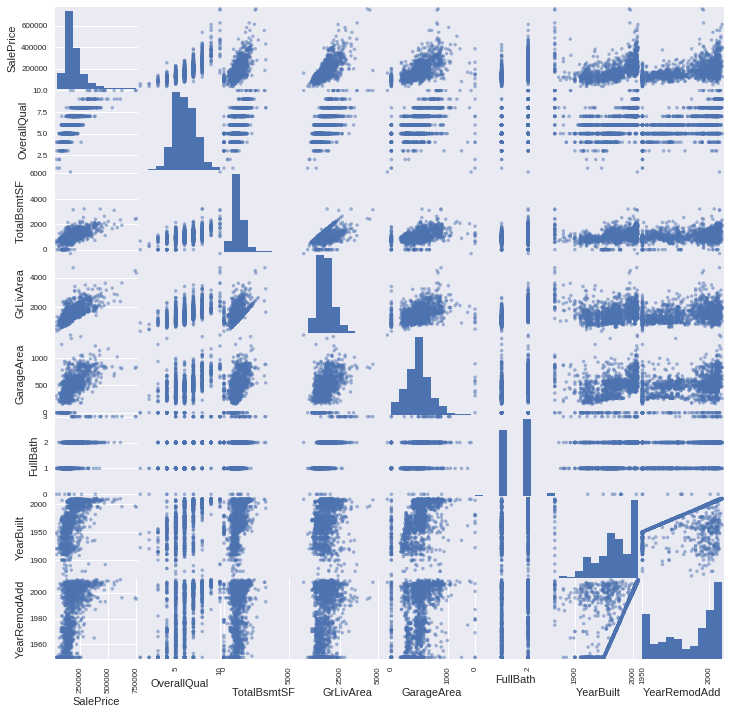

In [9]:
columns = ['SalePrice','OverallQual','TotalBsmtSF','GrLivArea','GarageArea','FullBath','YearBuilt','YearRemodAdd']
pd.plotting.scatter_matrix(train[columns],figsize=(12,12))
plt.figure()

### Heatmap

In [0]:
# Adding total sqfootage feature 
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']

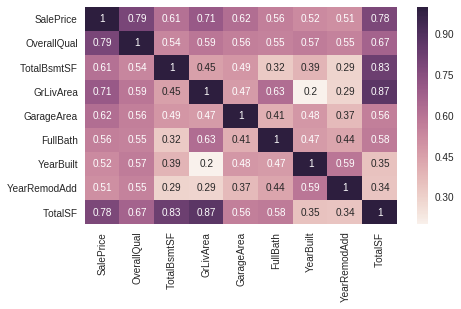

In [11]:
plt.figure(figsize=(7,4)) 
columns = ['SalePrice','OverallQual','TotalBsmtSF','GrLivArea','GarageArea','FullBath','YearBuilt','YearRemodAdd', 'TotalSF']
sns.heatmap(train[columns].corr(),annot=True)
plt.show()

### Histogram

We can also create a **histogram** of each input variable to get an idea of the distribution.



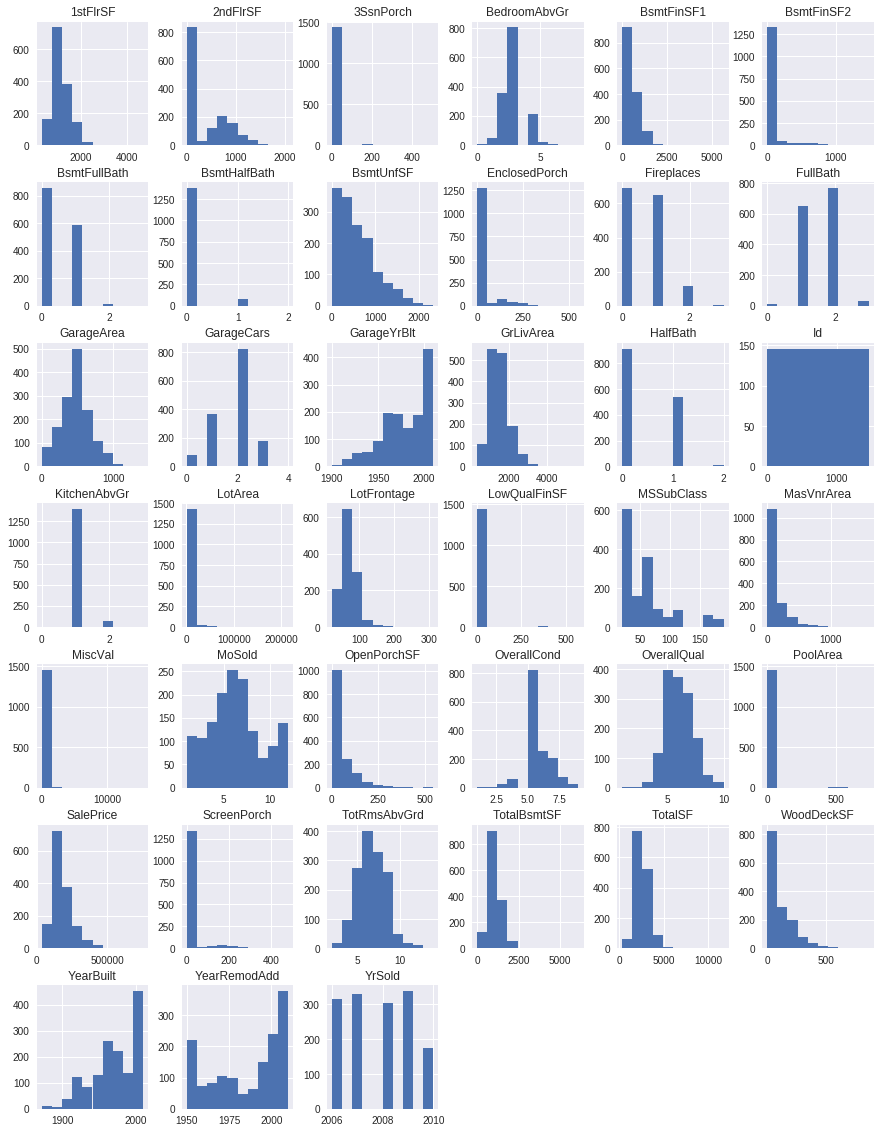

In [12]:
# histograms
train.hist(figsize=(15,20))
plt.figure()

### Scraping the Data (Optional for the workshop)

- Removing ID
- Imputing missing/NA values (selection: 0, None, mean, median, ML, what makes sense....)
- Transform some numerical values that are really categorical (MSSubClass, OverallCond, YrSold, MonthSold)
- LabelEncoding
- Adding TotalSF (done in workshop)

# Linear Regression : One Variable

## Picking the target variable


In [13]:
training_set = open('dataset/train.csv')
csv_training_set = csv.DictReader(training_set)

total_sf = []
sale_price = []

#There is a better way to combine the total square footage
for row in csv_training_set:
  temp_total_sf = 0
  temp_total_sf += float(row['TotalBsmtSF'])
  temp_total_sf += float(row['1stFlrSF'])
  temp_total_sf += float(row['2ndFlrSF'])
  total_sf.append(temp_total_sf)
  sale_price.append(row['SalePrice'])

total_sf = np.array(total_sf, dtype='float64')
sale_price = np.array(sale_price, dtype='float64')
print('total square footage array:', total_sf)
print('sale price array:', sale_price)

total square footage array: [2566. 2524. 2706. ... 3492. 2156. 2512.]
sale price array: [208500. 181500. 223500. ... 266500. 142125. 147500.]


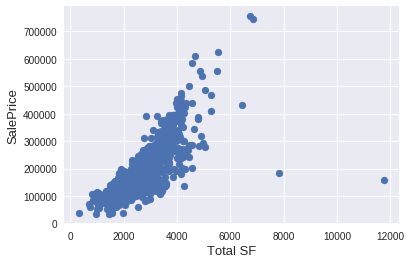

In [14]:
fig, ax = plt.subplots()
ax.scatter(x = total_sf, y = sale_price)
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('Total SF', fontsize=13)
plt.show()

## Noise filtering

In [0]:
train = pd.read_csv('dataset/train.csv')
test= pd.read_csv('dataset/test.csv')

In [0]:
# Adding total sqfootage feature 
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']

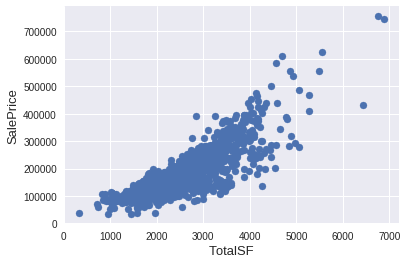

In [17]:

#Deleting outliers
train = train.drop(train[(train['TotalSF']>7000) & (train['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['TotalSF'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalSF', fontsize=13)
plt.show()

## The Cost Function

In [0]:
def computeCost(X,theta,y):
    predicted = np.dot(theta, X)
    cost = np.sum(np.square(predicted - y))
    cost /= (2 * len(y))
    return cost


## Gradient Descent



### The Algorithm

In [0]:
def gradient_descent(X, y, theta, alpha, num_iters):
    # Performs gradient descent to learn theta
    # updates theta by taking 'num_iters' gradient steps with learning rate 'alpha'

    # initialize some useful values
    m = len(y)  # number of training examples
    cost_history = np.zeros(num_iters)

    for iter in range(num_iters):
        temp = np.sum((np.dot(theta, X) - y)*X, axis=1)

        theta = theta - (alpha / m) * temp

        cost_history[iter] = computeCost(X, theta, y)
        
    # The following steps are not part of the algorithm, but help keep track of the performance of the algorithm.
    ## Feel free to ignore them for your comprehension
    print('cost_history:', '\n', cost_history)
    step = [cost_history[idx+1]-cost for idx, cost in enumerate(cost_history) if idx<num_iters-1]
    step = np.array(step)
    print(step)
    print('final theta:', theta)
    
    x = np.linspace(0, num_iters-2, num_iters-1)
    y = np.abs(step)
    print(x)
    print('steps:', y)
    plt.plot(x, y)
    plt.show()
    
    return theta

### Implementation

theta array: [0. 0.]
1460
first floor square footage array(ones inserted):
 [[1.000e+00 1.000e+00 1.000e+00 ... 1.000e+00 1.000e+00 1.000e+00]
 [2.566e+03 2.524e+03 2.706e+03 ... 3.492e+03 2.156e+03 2.512e+03]]
initial cost: 19519633853.882877
cost_history: 
 [4.98298487e+09 2.00127243e+09 1.38967280e+09 1.26422338e+09
 1.23849158e+09 1.23321355e+09 1.23213094e+09 1.23190888e+09
 1.23186333e+09 1.23185399e+09]
[-2.98171244e+09 -6.11599627e+08 -1.25449423e+08 -2.57317975e+07
 -5.27802688e+06 -1.08261278e+06 -2.22062421e+05 -4.55489962e+04
 -9.34310879e+03]
final theta: [2.26089809e-02 7.09308505e+01]
[0. 1. 2. 3. 4. 5. 6. 7. 8.]
steps: [2.98171244e+09 6.11599627e+08 1.25449423e+08 2.57317975e+07
 5.27802688e+06 1.08261278e+06 2.22062421e+05 4.55489962e+04
 9.34310879e+03]


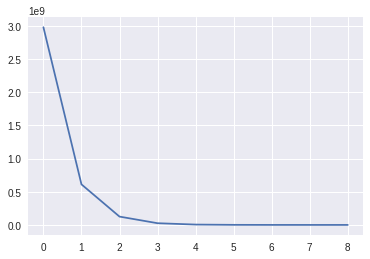

In [20]:
#Gradient Descent
#Some gradient descent settings
iterations = 10
alpha = 0.0000002

theta = np.zeros(2)
print('theta array:', theta)


# initial cost
# first row of X = ones
num_training_ex = len(sale_price)
print(num_training_ex)
X = np.vstack((np.ones(num_training_ex),total_sf))
print('first floor square footage array(ones inserted):''\n', X)

initial_cost = computeCost(X, theta, sale_price)
print('initial cost:', initial_cost)


# run gradient descent
theta = gradient_descent(X, sale_price, theta, alpha, iterations)


**Plotting Performance**

### Scikit-learn implementation

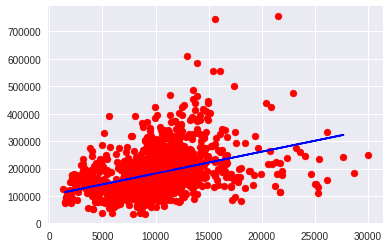

In [21]:
from sklearn import linear_model
import matplotlib.pyplot as plt

model = linear_model.LinearRegression()

train = train[train['LotArea'] < 30000]
test = test[test['LotArea'] < 30000]

X_train = train['LotArea']
X_train = X_train.values.reshape(-1, 1)

Y_train = train['SalePrice']
Y_train = Y_train.values.reshape(-1, 1)

X_test = test['LotArea']
X_test = X_test.values.reshape(-1, 1)

model.fit(X_train, Y_train)
pred = model.predict(X_test)

plt.scatter(X_train, Y_train, color='red')
plt.plot(X_test, pred, color='blue')

## Normalizing the sale price (Extra Material)
SalePrice is the variable we need to predict. So let's do some analysis on this variable first.


 mu = 179516.29 and sigma = 77763.67



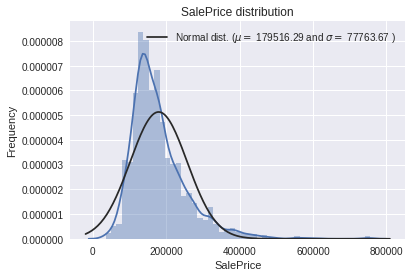

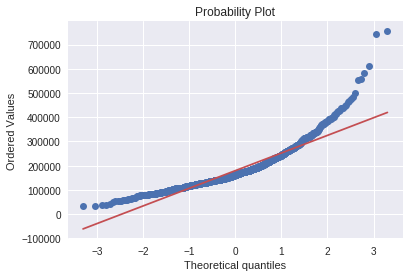

In [22]:
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

The target variable is right skewed. **As linear models love normally distributed data** , we need to transform this variable and make it more normally distributed.


Log-transformation of the target variable


 mu = 12.02 and sigma = 0.40



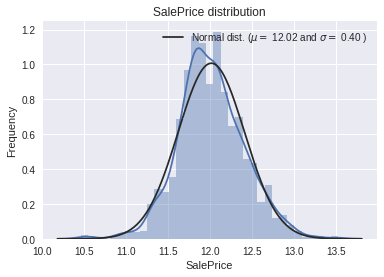

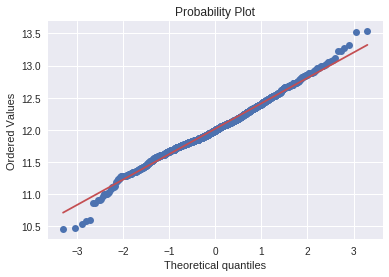

In [23]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

What happens if you use this new representation of the sale price in your model?

# Linear Regression : Multiple Variables

In [24]:
training_set = open('dataset/train.csv')
csv_training_set = csv.DictReader(training_set)

feature_list = [
  'OverallQual',
  'YearBuilt',
  'TotalBsmtSF',
  '1stFlrSF',
  '2ndFlrSF',
  'FullBath'
]

nb_features = len(feature_list)
feature_matrix = np.empty([nb_features,1])
sale_price = []
num_training_ex = 0

for idx, row in enumerate(csv_training_set):
    feature_column = []
    for feature in feature_list:
        #if row[feature] == 'NA':
        #    row[feature] = 0
        feature_column.append(row[feature])
    feature_vector = np.array([feature_column], dtype='float64').T
    if idx is 0:
        feature_matrix = feature_vector
    else:
        feature_matrix = np.concatenate([feature_matrix, feature_vector], axis=1)
    sale_price.append(row['SalePrice'])

sale_price = np.array(sale_price, dtype='float64')
print('Features Matrix:', '\n', feature_matrix)
print('Sale Price Array:', '\n', sale_price)

Features Matrix: 
 [[7.000e+00 6.000e+00 7.000e+00 ... 7.000e+00 5.000e+00 5.000e+00]
 [2.003e+03 1.976e+03 2.001e+03 ... 1.941e+03 1.950e+03 1.965e+03]
 [8.560e+02 1.262e+03 9.200e+02 ... 1.152e+03 1.078e+03 1.256e+03]
 [8.560e+02 1.262e+03 9.200e+02 ... 1.188e+03 1.078e+03 1.256e+03]
 [8.540e+02 0.000e+00 8.660e+02 ... 1.152e+03 0.000e+00 0.000e+00]
 [2.000e+00 2.000e+00 2.000e+00 ... 2.000e+00 1.000e+00 1.000e+00]]
Sale Price Array: 
 [208500. 181500. 223500. ... 266500. 142125. 147500.]


## Feature Scaling

In [25]:
for i, column in enumerate(feature_matrix):
    max = np.max(column)
    min = np.min(column)
    spread = max - min
    mean = np.mean(column)
    # print('Column before Scaling:', column)

    for j, content in enumerate(column):
        column[j] = (content-mean)/spread
    # print('Column after Scaling:', column)
    feature_matrix[i] = column

print('Feature Matrix After Scaling:', '\n', feature_matrix)

Feature Matrix After Scaling: 
 [[ 0.1000761  -0.01103501  0.1000761  ...  0.1000761  -0.12214612
  -0.12214612]
 [ 0.22994342  0.03429124  0.21545067 ... -0.21933194 -0.15411455
  -0.0454189 ]
 [-0.03296718  0.03348127 -0.02249255 ...  0.01547799  0.0033667
   0.03249927]
 [-0.0703595   0.0228025  -0.05567387 ...  0.00582223 -0.0194187
   0.02142572]
 [ 0.24552423 -0.16803509  0.25133537 ...  0.38983416 -0.16803509
  -0.16803509]
 [ 0.14497717  0.14497717  0.14497717 ...  0.14497717 -0.18835616
  -0.18835616]]


theta array: [0. 0. 0. 0. 0. 0. 0.]
first floor square footage array(ones inserted):
 [[ 1.          1.          1.         ...  1.          1.
   1.        ]
 [ 0.1000761  -0.01103501  0.1000761  ...  0.1000761  -0.12214612
  -0.12214612]
 [ 0.22994342  0.03429124  0.21545067 ... -0.21933194 -0.15411455
  -0.0454189 ]
 ...
 [-0.0703595   0.0228025  -0.05567387 ...  0.00582223 -0.0194187
   0.02142572]
 [ 0.24552423 -0.16803509  0.25133537 ...  0.38983416 -0.16803509
  -0.16803509]
 [ 0.14497717  0.14497717  0.14497717 ...  0.14497717 -0.18835616
  -0.18835616]]
initial cost: 19519633853.882877
cost_history: 
 [6.81871490e+09 3.41638552e+09 2.38728022e+09 ... 7.52707777e+08
 7.52707777e+08 7.52707777e+08]
[-3.40232938e+09 -1.02910530e+09 -3.98136057e+08 ... -6.20770454e-03
 -6.18875027e-03 -6.17063046e-03]
final theta: [180921.19589041 205140.98949137  60575.83244219 117235.14355793
 321445.12053939 115309.36257465 -15652.68413824]
[0.000e+00 1.000e+00 2.000e+00 ... 4.996e+03 4.997e+03

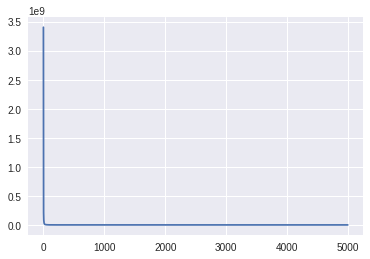

In [26]:
#Gradient Descent
#Some gradient descent settings
iterations = 5000
alpha = 1.5

theta = np.zeros(nb_features+1)
print('theta array:', theta)


# initial cost
# first row of X = ones
num_training_ex = len(sale_price) 
X = np.vstack((np.ones(num_training_ex),feature_matrix))
print('first floor square footage array(ones inserted):''\n', X)

current_cost = computeCost(X, theta, sale_price)
print('initial cost:', current_cost)


# run gradient descent
theta = gradient_descent(X, sale_price, theta, alpha, iterations)

## Other scikit-learn implementation

In [27]:
features = ['LotArea', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd']

X_train = train[features]
X_test = test[features]

Y_train = train['SalePrice']
Y_train = Y_train.values.reshape(-1, 1)

model.fit(X_train, Y_train)
pred = model.predict(X_test)

print(pred)

[[11.93204322]
 [12.02775082]
 [12.01870424]
 ...
 [12.18738484]
 [11.94854665]
 [12.46935354]]


Can you find variables or sets of features that help your model perform better?

# Polynomial Regression



# Logistic Regression

# Pytorch Introduction

## Set up

In [28]:
!pip install torch

    100% |████████████████████████████████| 519.5MB 25kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x598be000 @  0x7fb7990302a4 0x594e17 0x626104 0x51190a 0x4f5277 0x510c78 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f6070 0x510c78 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f6070 0x4f3338 0x510fb0 0x5119bd 0x4f6070


In [29]:
!apt-get install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fontconfig libann0 libcairo2 libcdt5 libcgraph6 libdatrie1 libgd3
  libgts-0.7-5 libgts-bin libgvc6 libgvpr2 libjbig0 liblab-gamut1 libltdl7
  libpango-1.0-0 libpangocairo-1.0-0 libpangoft2-1.0-0 libpathplan4
  libpixman-1-0 libthai-data libthai0 libtiff5 libwebp6 libxaw7 libxcb-render0
  libxcb-shm0 libxmu6 libxpm4 libxt6
Suggested packages:
  gsfonts graphviz-doc libgd-tools
The following NEW packages will be installed:
  fontconfig graphviz libann0 libcairo2 libcdt5 libcgraph6 libdatrie1 libgd3
  libgts-0.7-5 libgts-bin libgvc6 libgvpr2 libjbig0 liblab-gamut1 libltdl7
  libpango-1.0-0 libpangocairo-1.0-0 libpangoft2-1.0-0 libpathplan4
  libpixman-1-0 libthai-data libthai0 libtiff5 libwebp6 libxaw7 libxcb-render0
  libxcb-shm0 libxmu6 libxpm4 libxt6
0 upgraded, 30 newly installed, 0 to remove and 2 not upgraded.
Need to get 4,154 kB of

In [30]:
!pip install git+https://github.com/szagoruyko/pytorchviz


  Cloning https://github.com/szagoruyko/pytorchviz to /tmp/pip-req-build-cx_vhcxy
  Running setup.py bdist_wheel for pytorchviz ... - done
  Stored in directory: /tmp/pip-ephem-wheel-cache-ge4tk4xs/wheels/b9/b9/85/ef34936f58754cb23840fd869be1367b5d525e29915a2a4fe9
Successfully built pytorchviz


## Code

In [0]:
#!/usr/bin/env python
from __future__ import print_function
from itertools import count

import torch
import torch.autograd
import torch.nn.functional as F

In [0]:
POLY_DEGREE = 4
W_target = torch.randn(POLY_DEGREE, 1) * 2
b_target = torch.randn(1) * 2

In [0]:
def make_features(x):
    """Builds features i.e. a matrix with columns [x, x^2, x^3, x^4]."""
    x = x.unsqueeze(1)
    return torch.cat([x ** i for i in range(1, POLY_DEGREE+1)], 1)


def f(x):
    """Approximated function."""
    return x.mm(W_target) + b_target.item()


def poly_desc(W, b):
    """Creates a string description of a polynomial."""
    result = 'y = '
    for i, w in enumerate(W):
        result += '{:+.2f} x^{} '.format(w, len(W) - i)
    result += '{:+.2f}'.format(b[0])
    return result


def get_batch(batch_size=32):
    """Builds a batch i.e. (x, f(x)) pair."""
    random = torch.randn(batch_size)
    x = make_features(random)
    y = f(x)
    return x, y

In [0]:
# Define model
fc = torch.nn.Linear(W_target.size(0), 1)

In [0]:
for batch_idx in count(1):
    # Get data
    batch_x, batch_y = get_batch()

    # Reset gradients
    fc.zero_grad()

    # Forward pass
    output = F.smooth_l1_loss(fc(batch_x), batch_y)
    loss = output.item()

    # Backward pass
    output.backward()

    # Apply gradients
    for param in fc.parameters():
        param.data.add_(-0.1 * param.grad.data)

    # Stop criterion
    if loss < 1e-3:
        break

In [36]:
print('Loss: {:.6f} after {} batches'.format(loss, batch_idx))
print('==> Learned function:\t' + poly_desc(fc.weight.view(-1), fc.bias))
print('==> Actual function:\t' + poly_desc(W_target.view(-1), b_target))

Loss: 0.000882 after 270 batches
==> Learned function:	y = -0.24 x^4 +1.77 x^3 +2.61 x^2 +3.16 x^1 -1.74
==> Actual function:	y = -0.25 x^4 +1.76 x^3 +2.62 x^2 +3.17 x^1 -1.70


## Now let's look at the computation graph

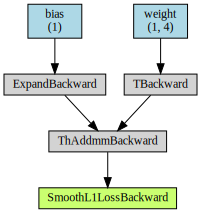

In [37]:
from graphviz import Digraph
import torch
from torch.autograd import Variable

from torchviz import make_dot

batch_x, batch_y = get_batch()
output = F.smooth_l1_loss(fc(batch_x), batch_y)
make_dot(output,params=dict(fc.named_parameters()))

# More Regression Algorithms (Extra Material)

In [38]:
!pip install lightgbm
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

    100% |████████████████████████████████| 1.1MB 8.9MB/s 


## Operations on the data


In [0]:
train = pd.read_csv('dataset/train.csv')
test= pd.read_csv('dataset/test.csv')

In [0]:
numberic_features=train.select_dtypes(include=[np.number])
categorical_features=train.select_dtypes(include=[np.object])

In [0]:
# Save Id and drop it
train_ID=train['Id']
test_ID=test['Id']
train.drop('Id',axis=1,inplace=True)
test.drop('Id',axis=1,inplace=True)

In [0]:
#Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

In [0]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

In [0]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)

In [0]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})

In [0]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")

In [0]:
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")

In [0]:
all_data["Alley"] = all_data["Alley"].fillna("None")

In [0]:
all_data["Fence"] = all_data["Fence"].fillna("None")

In [0]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [0]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

In [0]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

In [0]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

In [0]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

In [0]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

In [0]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

In [0]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")

In [0]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

In [0]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

In [0]:

all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

In [0]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [0]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [0]:
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

In [0]:
#Check remaining missing values if any 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})

In [0]:
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [0]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

In [0]:
# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [68]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})


Skew in numerical features: 



In [69]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 59 skewed numerical features to Box Cox transform


In [70]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 222)


In [0]:
train = all_data[:ntrain]
test = all_data[ntrain:]

## Defining a cross validation strategy

We use the cross_val_score function of **Sklearn**. However this function has not a shuffle attribut, we add then one line of code, in order to shuffle the dataset prior to cross-validation

In [0]:

#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

## Models

#### LASSO Regression 
In statistics and machine learning, lasso (least absolute shrinkage and selection operator)  is a **regression analysis** method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the statistical model it produces.  Lasso was originally formulated for least squares models and this simple case reveals a substantial amount about the behavior of the estimator, including its relationship to ridge regression and best subset selection and the connections between lasso coefficient estimates and so-called soft thresholding. It also reveals that (like standard linear regression) the coefficient estimates need not be unique if covariates are collinear.

This model may be very sensitive to outliers. So we need to made it more robust on them. For that we use the sklearn's Robustscaler() method on pipeline

In [0]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [74]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
Condition2_RRAn,53.981
RoofMatl_Membran,53.981
Exterior2nd_Other,53.981
Condition2_RRAe,53.981
RoofMatl_Metal,53.981
Electrical_Mix,53.981
Exterior1st_ImStucc,53.981
Heating_Floor,53.981
MiscFeature_TenC,53.981
Utilities_NoSeWa,53.981


#### Elastic Net Regression 
the elastic net is a regularized regression method that linearly combines the L1 and L2 penalties of the lasso and ridge methods.
again made robust to outliers

In [0]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

#### Kernel Ridge Regression 
Kernel ridge regression (KRR)  combines Ridge Regression (linear least squares with l2-norm regularization) with the kernel trick. It thus learns a linear function in the space induced by the respective kernel and the data. For non-linear kernels, this corresponds to a non-linear function in the original space.

In [0]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

#### Gradient Boosting Regression
With huber loss that makes it robust to outliers

In [0]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

#### XGBoost

In [0]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

#### LightGBM

In [0]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

### Base models scores

Let's see how these base models perform on the data by evaluating the cross-validation rmsle error

In [80]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1115 (0.0074)



In [81]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1116 (0.0074)



In [82]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.1152 (0.0075)



In [83]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1167 (0.0090)



In [84]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.1155 (0.0063)



In [85]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.1156 (0.0075)



Stacking models

Simplest Stacking approach : Averaging base models
We begin with this simple approach of averaging base models. We build a new class to extend scikit-learn with our model and also to laverage encapsulation and code reuse (inheritance)

Averaged base models class

In [0]:

class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1) 


Averaged base models score

We just average four models here ENet, GBoost, KRR and lasso. Of course we could easily add more models in the mix.

In [87]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1088 (0.0078)



In [0]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [89]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.1083 (0.0074)


In [0]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [91]:
#StackedRegressor
#Final Training and Prediction
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

0.07968327939112803


In [92]:
#XGBoost
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

0.07836464610140692


In [93]:
#lightGBM
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

0.0730553246313014


In [94]:
'''RMSE on the entire Train data when averaging'''

print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.70 +
               xgb_train_pred*0.15 + lgb_train_pred*0.15 ))

RMSLE score on train data:
0.07647072015870085


### Ensemble prediction

In [0]:
ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15

In [0]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ensemble
sub.to_csv('submission.csv',index=False)


Box Cox Transformation of (highly) skewed features

We use the scipy function boxcox1p which computes the Box-Cox transformation of 
1+x
1+x
.
Note that setting 
λ=0
λ=0
is equivalent to log1p used above for the target variable.
See this page for more details on Box Cox Transformation as well as the scipy function's page

In [97]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 222 skewed numerical features to Box Cox transform


# Conclusion

## 9- References
* [1] https://www.kaggle.com/mjbahmani/a-comprehensive-ml-workflow-for-house-prices
* [2] [https://skymind.ai/wiki/machine-learning-workflow](https://skymind.ai/wiki/machine-learning-workflow)
* [3] [Problem-define](https://machinelearningmastery.com/machine-learning-in-python-step-by-step/)
* [4] [Sklearn](http://scikit-learn.org/)
* [5] [machine-learning-in-python-step-by-step](https://machinelearningmastery.com/machine-learning-in-python-step-by-step/)
* [6] [Data Cleaning](http://wp.sigmod.org/?p=2288)
* [7] [kaggle kernel](https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard)

